In [1]:
%cd ..

c:\Users\justi\coding\Uni\MA


In [2]:
%matplotlib inline
import seaborn as sns
import numpy as np, scipy, IPython.display as ipd, matplotlib.pyplot as plt
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14, 5)

### Testing with cqt

In [15]:
# x, sr = librosa.load("./audio/tiny_aam/audio-mixes-mp3/0001_mix.mp3")
x1, sr = librosa.load("./audio/StructuredSamples/Piano/Alicias_Keys/Alicias_Keys_060_C4.wav")
x2, sr = librosa.load("./audio/StructuredSamples/Piano/Alicias_Keys/Alicias_Keys_079_G5.wav")
x = x1+x2
bins_per_octave = 12
fmin = librosa.note_to_hz("f0")
cqt = librosa.cqt(x[:sr], sr=sr, n_bins=88, bins_per_octave=bins_per_octave, fmin=fmin)
# log_cqt = librosa.amplitude_to_db(np.abs(cqt))
cqt_mag = np.abs(cqt)

c:\Users\justi\mambaforge-pypy3\envs\MA\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=256 is too large for input signal of length=173
  warnings.warn(


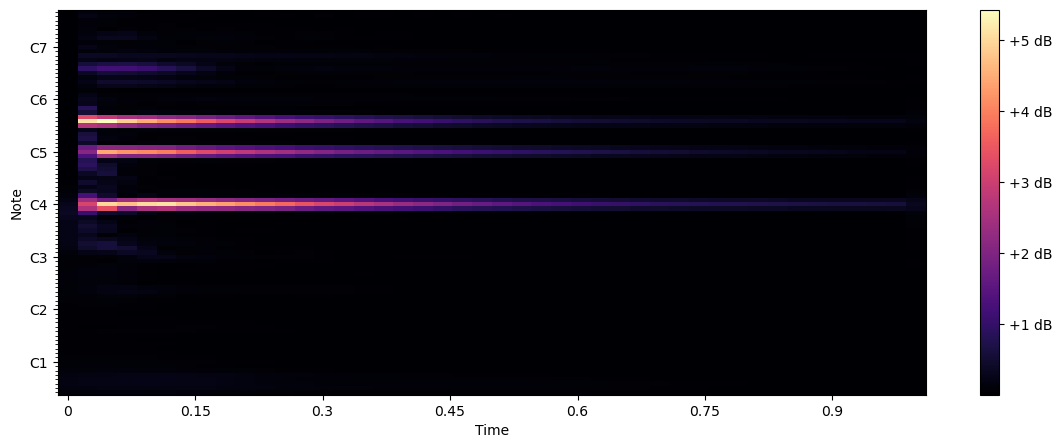

In [16]:
fig, ax = plt.subplots()
img = librosa.display.specshow(cqt_mag, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave, fmin=fmin, ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

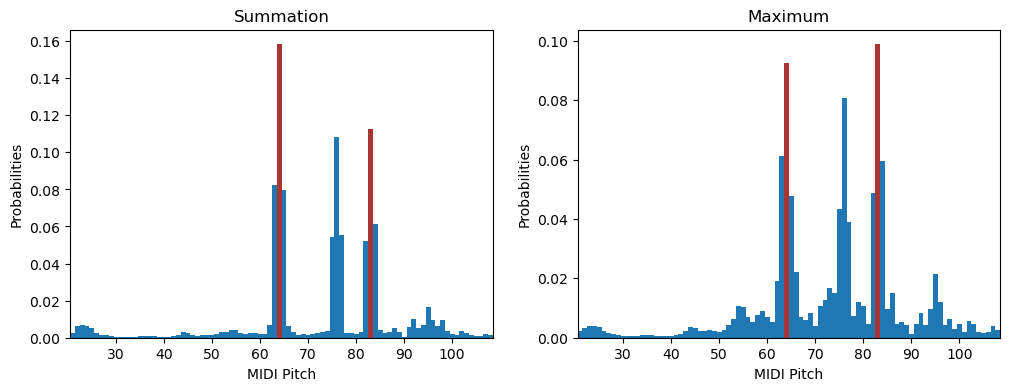

In [56]:
sums = np.sum(cqt_mag, axis=1)
probs_sum = sums / np.sum(sums)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].bar(x=list(range(21, 21+len(sums))), height=probs_sum, width=1)
ax[0].patches[43].set_facecolor('#aa3333')
ax[0].patches[62].set_facecolor('#aa3333')
ax[0].set_xlabel("MIDI Pitch")
ax[0].set_ylabel("Probabilities")
ax[0].set_title("Summation")
ax[0].autoscale(enable=True, axis='x', tight=True)

maxes = np.max(cqt_mag, axis=1)
probs_max = maxes / np.sum(maxes)
ax[1].bar(x=list(range(21, 21+len(sums))), height=probs_max, width=1)
ax[1].patches[43].set_facecolor('#aa3333')
ax[1].patches[62].set_facecolor('#aa3333')
ax[1].set_xlabel("MIDI Pitch")
ax[1].set_ylabel("Probabilities")
ax[1].set_title("Maximum")
ax[1].autoscale(enable=True, axis='x', tight=True)

c:\Users\justi\mambaforge-pypy3\envs\MA\lib\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=256 is too large for input signal of length=173
  warnings.warn(


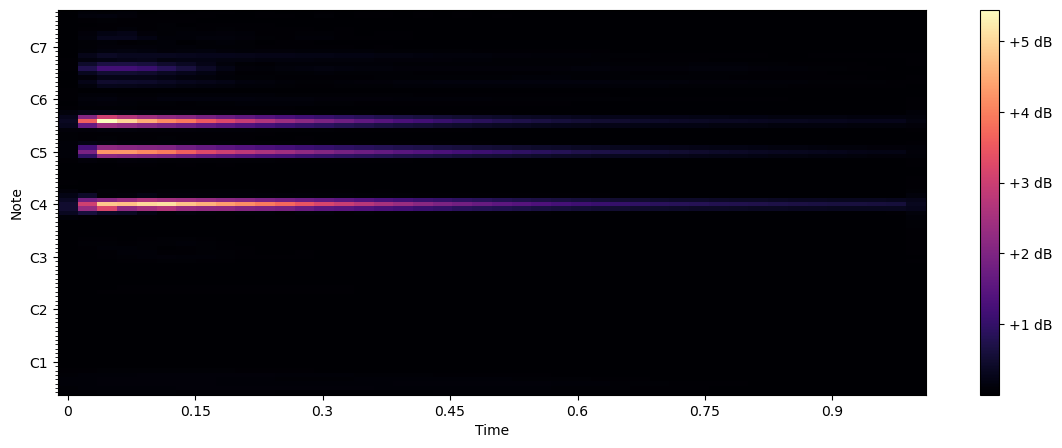

In [58]:
y_harm = librosa.effects.harmonic(y=x)
cqt_harm = librosa.cqt(y_harm[:sr], sr=sr, n_bins=88, bins_per_octave=bins_per_octave, fmin=fmin)
cqt_harm_magn = np.abs(cqt_harm)
log_cqt_harm = librosa.amplitude_to_db(np.abs(cqt_harm))
fig, ax = plt.subplots()
img = librosa.display.specshow(cqt_harm_magn, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave, fmin=fmin, ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

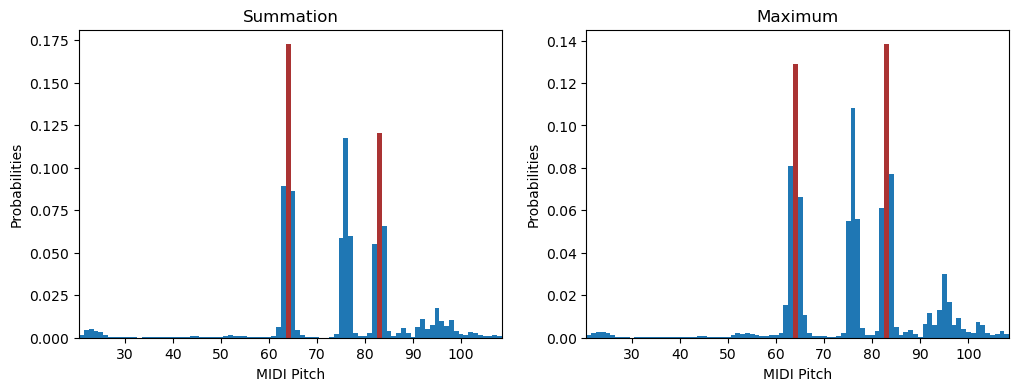

In [59]:
sums = np.sum(cqt_harm_magn, axis=1)
probs_sum = sums / np.sum(sums)
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].bar(x=list(range(21, 21+len(sums))), height=probs_sum, width=1)
ax[0].patches[43].set_facecolor('#aa3333')
ax[0].patches[62].set_facecolor('#aa3333')
ax[0].set_xlabel("MIDI Pitch")
ax[0].set_ylabel("Probabilities")
ax[0].set_title("Summation")
ax[0].autoscale(enable=True, axis='x', tight=True)

maxes = np.max(cqt_harm_magn, axis=1)
probs_max = maxes / np.sum(maxes)
ax[1].bar(x=list(range(21, 21+len(sums))), height=probs_max, width=1)
ax[1].patches[43].set_facecolor('#aa3333')
ax[1].patches[62].set_facecolor('#aa3333')
ax[1].set_xlabel("MIDI Pitch")
ax[1].set_ylabel("Probabilities")
ax[1].set_title("Maximum")
ax[1].autoscale(enable=True, axis='x', tight=True)

In [31]:
np.min(log_cqt), np.max(log_cqt)

(-67.909515, 12.090485)

In [32]:
np.min(np.abs(cqt)), np.max(np.abs(cqt))

(8.4954845e-06, 4.022761)

In [33]:
np.clip(np.max(log_cqt, axis=1), a_min=0, a_max=None) / np.sum(np.clip(np.max(log_cqt, axis=1), a_min=0, a_max=None))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02784788,
       0.15508676, 0.23151554, 0.12890613, 0.        , 0.        ,
       0.        , 0.        , 0.06150898, 0.1735124 , 0.08183886,
       0.        , 0.        , 0.        , 0.08795303, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01634959, 0.        , 0.        , 0.02450205, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0109788 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [35]:
eps = 1
abs_cqt_harm = np.abs(cqt_harm)
abs_cqt_harm[abs_cqt_harm < eps] = 0
np.clip(np.max(abs_cqt_harm, axis=1), a_min=0, a_max=None) / np.sum(np.clip(np.max(abs_cqt_harm, axis=1), a_min=0, a_max=None))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.17246446, 0.3167105 , 0.17484193, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.22068846, 0.11529468,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [25]:
extract_pitch_probabilities(y=x, n_bins=88, fmin=fmin)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07441726, 0.11237106, 0.08892206, 0.09948239, 0.15300721,
       0.10990139, 0.        , 0.        , 0.        , 0.07613087,
       0.        , 0.        , 0.        , 0.08614957, 0.        ,
       0.        , 0.0885234 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.11109478, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
np.argmax(np.max(log_cqt, axis=1))

24

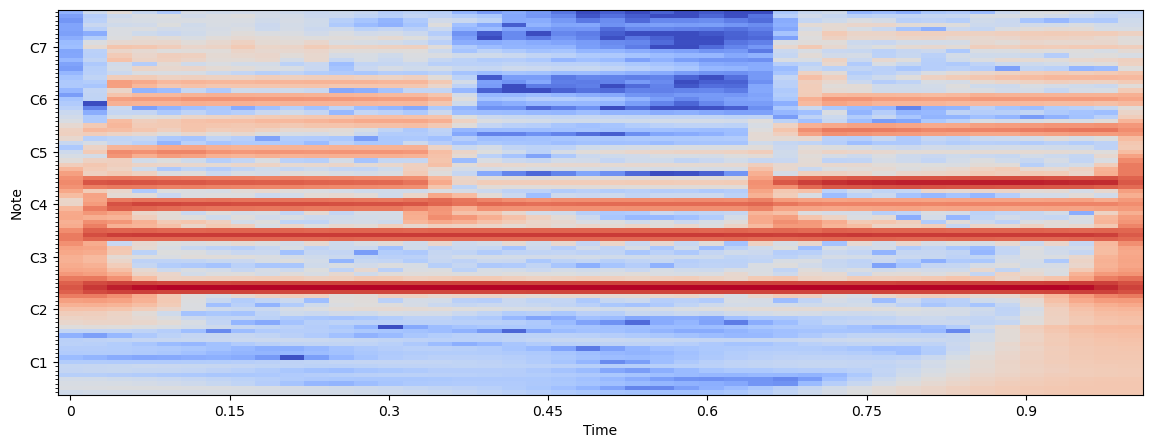

In [6]:
librosa.display.specshow(log_cqt, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave, fmin=fmin)

In [7]:
from scipy.special import softmax
softmaxed = softmax(abs(cqt), axis=0)
softmaxed.shape

(88, 44)

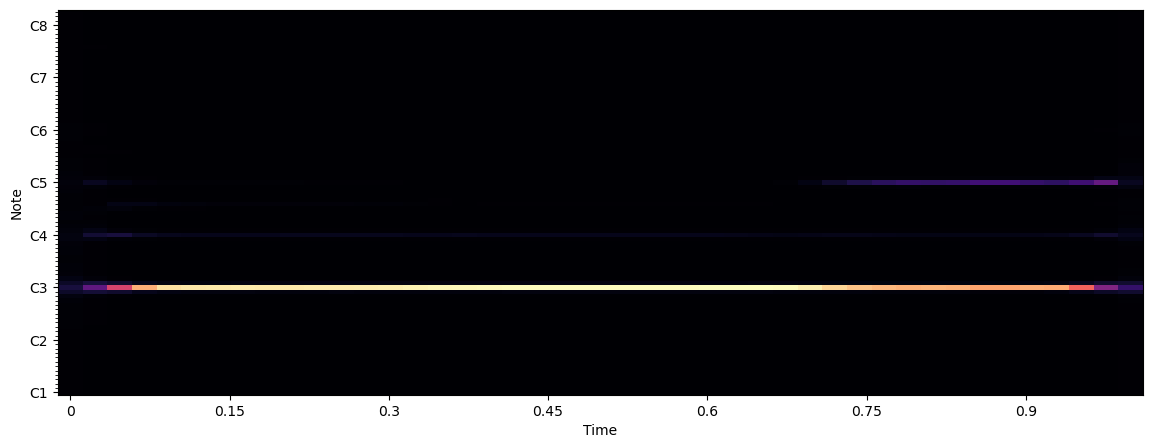

In [8]:
librosa.display.specshow(softmaxed, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave)

In [9]:
# Normalization
norm = - log_cqt / np.sum(log_cqt, axis=0)
norm.shape

(88, 44)

In [10]:
np.sum(norm)

-44.0

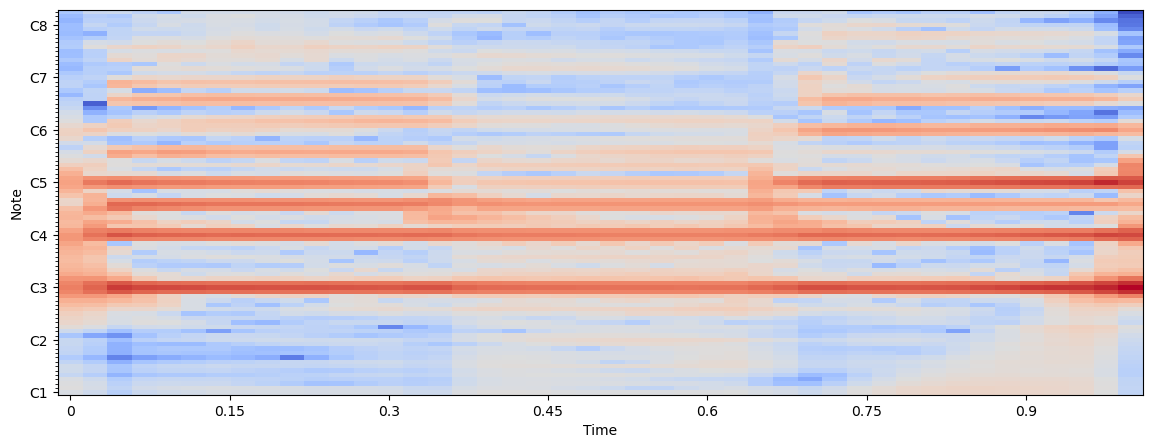

In [11]:
librosa.display.specshow(norm, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave)

In [12]:
clipped_cqt = np.clip(log_cqt, a_min=0, a_max=None)
np.min(clipped_cqt), np.max(clipped_cqt)

(0.0, 17.134773)

In [13]:
clipped_cqt[15:25, 0]

array([0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 2.1776652, 7.053335 , 8.46104  ], dtype=float32)

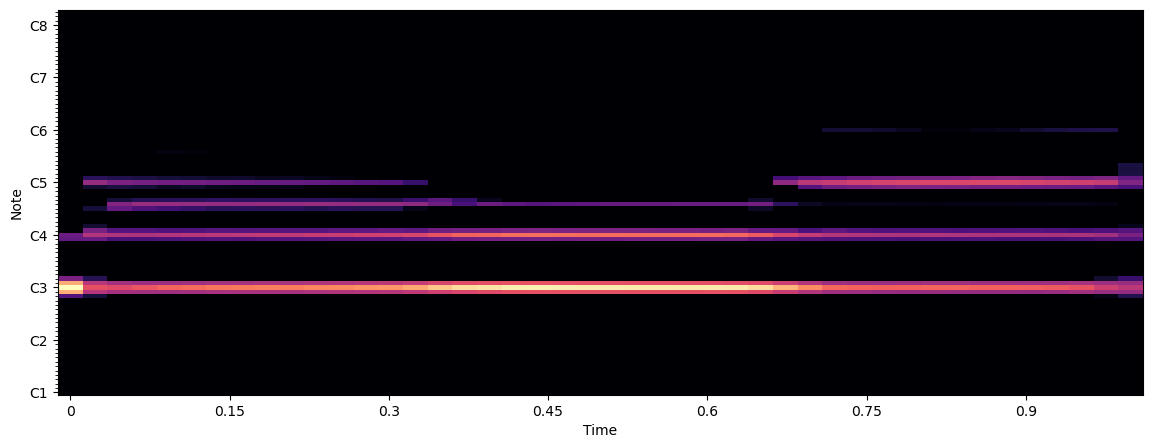

In [14]:
norm_clipped = clipped_cqt / np.sum(clipped_cqt, axis=0)
librosa.display.specshow(norm_clipped, sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave)

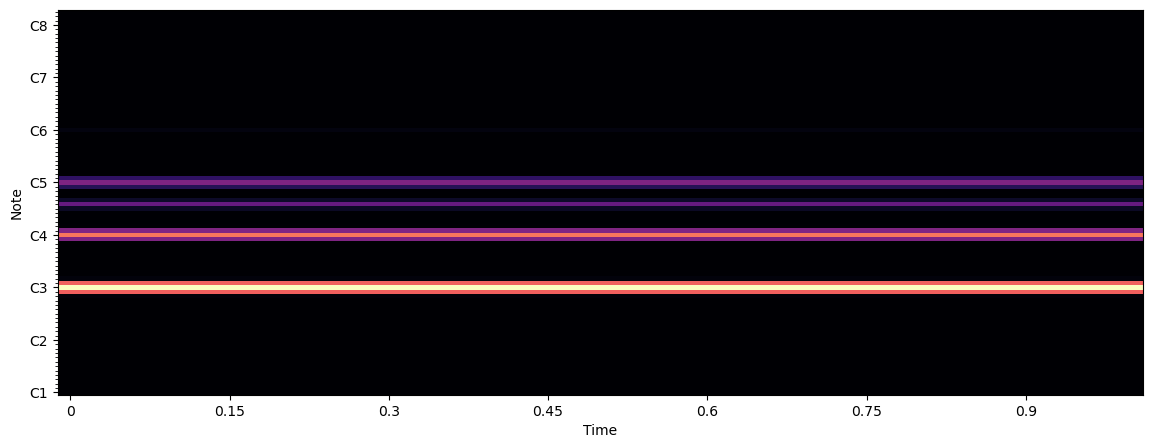

In [15]:
cqt_sums_over_window = np.sum(norm_clipped, axis=1)
sums_clipped = np.clip(cqt_sums_over_window, a_min=0, a_max=None)

librosa.display.specshow(np.transpose(np.tile(sums_clipped, (44, 1))), sr=sr, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=bins_per_octave)

In [16]:
sums_clipped_normalized = sums_clipped / np.sum(sums_clipped, axis=0)
sums_clipped_normalized

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00318761, 0.13216688, 0.20017563,
       0.1334328 , 0.00465441, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07277963, 0.14261915, 0.07365844, 0.00081281, 0.        ,
       0.        , 0.        , 0.01407077, 0.06036353, 0.01557694,
       0.        , 0.        , 0.03006619, 0.07341968, 0.03495351,
       0.00070386, 0.00065983, 0.00070445, 0.        , 0.        ,
       0.00035048, 0.        , 0.        , 0.        , 0.        ,
       0.00564343, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
"""def extract_pitch_probabilities(y, sr, bins_per_octave=12, fmin=librosa.note_to_hz("f0")):
    cqt = librosa.cqt(y=y, sr=sr, n_bins=88, bins_per_octave=bins_per_octave, fmin=fmin)
    log_cqt = librosa.amplitude_to_db(np.abs(cqt))
    clipped_cqt = np.clip(log_cqt, a_min=0, a_max=None)
    norm_clipped = clipped_cqt / np.sum(clipped_cqt, axis=0)
    return np.nan_to_num(norm_clipped)"""

'def extract_pitch_probabilities(y, sr, bins_per_octave=12, fmin=librosa.note_to_hz("f0")):\n    cqt = librosa.cqt(y=y, sr=sr, n_bins=88, bins_per_octave=bins_per_octave, fmin=fmin)\n    log_cqt = librosa.amplitude_to_db(np.abs(cqt))\n    clipped_cqt = np.clip(log_cqt, a_min=0, a_max=None)\n    norm_clipped = clipped_cqt / np.sum(clipped_cqt, axis=0)\n    return np.nan_to_num(norm_clipped)'

In [23]:
def extract_pitch_probabilities(y, sr=22050, n_bins=88, bins_per_octave=12, fmin=librosa.note_to_hz("a0"), k_pitches=10):
    """Estimates the pitches in the given signal y and turns
    these estimations into a probability distribution.

    Parameters
    ----------
    y : np.ndarray
        Input signal.
    sr : int, optional
        Sample rate, by default 22050
    n_bins : int, optional
        Number of bins to return, 
        Passed to librosa.cqt, by default 88
    bins_per_octave : int, optional
        Passed to librosa.cqt, by default 12
    fmin : float, optional
        Minimum frequency for librosa.cqt, by default librosa.note_to_hz("f0")

    Returns
    -------
    np.ndarray
        A probability distribution across the 88 pitches we are working with.
    """
    cqt = librosa.cqt(y=y, sr=sr, n_bins=n_bins, bins_per_octave=bins_per_octave, fmin=fmin)
    #log_cqt = librosa.amplitude_to_db(np.abs(cqt))
    abs_cqt = np.abs(cqt)
    clipped_cqt = np.clip(abs_cqt, a_min=0, a_max=None)
    cqt_sum = np.sum(clipped_cqt, axis=1)
    part_idx = np.argpartition(cqt_sum, kth=-k_pitches)[-k_pitches]
    part_val = cqt_sum[part_idx]
    cqt_sum[cqt_sum < (part_val - 0.0001)] = 0
    sum_norm = cqt_sum / np.sum(cqt_sum)
    if np.isnan(sum_norm).any() or not np.isclose(np.sum(sum_norm), 1):
        return [1/len(sum_norm) for _ in range(len(sum_norm))]
    else:
        return sum_norm


In [29]:
pitches = extract_pitch_probabilities(y=x[:sr])
plt.bar(np.arange(20, 20 + len(pitches)), pitches)

NameError: name 'x' is not defined

### Test initial population error

In [13]:
from typing import Any, Callable, Union

import numpy as np
from tqdm import tqdm

from evoaudio.sample_library import SampleLibrary
from evoaudio.individual import BaseIndividual
from evoaudio.mutations import Mutator
from evoaudio.fitness import multi_onset_fitness_cached
from evoaudio.population import Population
from evoaudio.population_logging import PopulationLogger
from evoaudio.target import Target

N_SAMPLES_P = [0.1, 0.3, 0.3, 0.2, 0.1]
POPSIZE = 10
N_RUNS = 100

def create_weighted_individual(pitch_weights:list[float], sample_lib:SampleLibrary):
    ind = BaseIndividual()
    n_samples = np.random.choice(list(range(5)), p=N_SAMPLES_P) + 1
    drawn_pitches = np.random.choice(list(range(21, 109)), size=n_samples, p=pitch_weights)
    instruments = [sample_lib.get_random_instrument_for_pitch(pitch) for pitch in drawn_pitches]
    ind.samples = [sample_lib.get_sample(instrument, style, drawn_pitches[i]) for i, (instrument, style) in enumerate(instruments)]
    return ind

def init_population(sample_lib:SampleLibrary, target:Target, popsize:int, pitch_weights:list[float]) -> Population:
    # Create initial population
    population = Population()
    population.individuals = [create_weighted_individual(pitch_weights=pitch_weights, sample_lib=sample_lib) for _ in tqdm(range(popsize), desc="Initializing Population", disable=True)]
    for individual in tqdm(population.individuals, desc="Calculating initial fitness", disable=True):
        # Calc initial fitness
        individual.fitness_per_onset = multi_onset_fitness_cached(target, individual)
        individual.calc_phi_fitness()
    population.init_archive(target.onsets) # Initial record of best approximations of each onset
    population.sort_individuals_by_fitness() # Sort population for easier management
    return population

def create_sample_set(sample_lib:SampleLibrary):
    individuals = [BaseIndividual.create_random_individual(sample_lib=sample_lib, phi=1.0) for _ in range(N_RUNS)]
    # Ensure pitches are below a threshold (c6) so that 
    # the shift doesn't raise pitch too high
    for individual in individuals:
        for i, sample in enumerate(individual.samples):
            if sample.pitch > 84: # c6
                new_pitch = sample.pitch - 12
                instrument, style = sample_lib.get_random_instrument_for_pitch(new_pitch)
                individual.samples[i] = sample_lib.get_sample(instrument=instrument, style=style, pitch=new_pitch)
    annotations = [[(sample.instrument, str(sample.pitch.value)) for sample in ind.samples] for ind in individuals]
    return individuals, annotations


In [ ]:
sample_lib = SampleLibrary()
individuals, annotations = create_sample_set(sample_lib)

## Baseline (Uniform)

In [30]:
from evoaudio.base_algorithms import approximate_piece
from evoaudio.jaccard import jaccard_error, class_mode

mixes = [ind.to_mixdown() for ind in individuals]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
pitch_weights = [np.repeat(1/88, 88) for mix in mixes] # Uniform weights
pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
errors = []
for i, annotation in enumerate(annotations):
    pop = pops[i]
    errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
print(f"Errors for baseline = {np.mean(errors)}")

Errors for baseline = 0.967388888888889


## Test CQT with ranks

In [14]:
def extract_pitches_cqt_ranked(y, sr=22050, n_bins=88, bins_per_octave=12, fmin=librosa.note_to_hz("a0"), k_pitches=10):
    """Estimates the pitches in the given signal y and turns
    these estimations into a probability distribution.

    Parameters
    ----------
    y : np.ndarray
        Input signal.
    sr : int, optional
        Sample rate, by default 22050
    n_bins : int, optional
        Number of bins to return, 
        Passed to librosa.cqt, by default 88
    bins_per_octave : int, optional
        Passed to librosa.cqt, by default 12
    fmin : float, optional
        Minimum frequency for librosa.cqt, by default librosa.note_to_hz("f0")

    Returns
    -------
    np.ndarray
        A probability distribution across the 88 pitches we are working with.
    """
    cqt = librosa.cqt(y=y, sr=sr, n_bins=n_bins, bins_per_octave=bins_per_octave, fmin=fmin)
    #log_cqt = librosa.amplitude_to_db(np.abs(cqt))
    abs_cqt = np.abs(cqt)
    clipped_cqt = np.clip(abs_cqt, a_min=0, a_max=None)
    cqt_sum = np.sum(clipped_cqt, axis=1)
    part_idx = np.argpartition(cqt_sum, kth=-k_pitches)[-k_pitches]
    part_val = cqt_sum[part_idx]
    cqt_sum[cqt_sum < (part_val - 0.0001)] = 0
    sum_norm = cqt_sum / np.sum(cqt_sum)
    if np.isnan(sum_norm).any() or not np.isclose(np.sum(sum_norm), 1):
        return [1/len(sum_norm) for _ in range(len(sum_norm))]
    else:
        return sum_norm

full_errors = []
mixes = [ind.to_mixdown() for ind in individuals]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")

Errors for k = 1: 0.7216666666666667
Errors for k = 2: 0.6888333333333333
Errors for k = 3: 0.6934047619047619
Errors for k = 4: 0.7214047619047619
Errors for k = 5: 0.7063690476190474
Errors for k = 6: 0.717107142857143
Errors for k = 7: 0.7461666666666666
Errors for k = 8: 0.753781746031746
Errors for k = 9: 0.7505714285714284
Errors for k = 10: 0.7445555555555555
Errors for k = 11: 0.7536785714285713
Errors for k = 12: 0.7985317460317459
Errors for k = 13: 0.74690873015873
Errors for k = 14: 0.7808571428571429
Errors for k = 15: 0.7430079365079365
Errors for k = 16: 0.7539603174603176
Errors for k = 17: 0.7660119047619047
Errors for k = 18: 0.7830952380952381
Errors for k = 19: 0.7740714285714284


(0.65, 0.85)

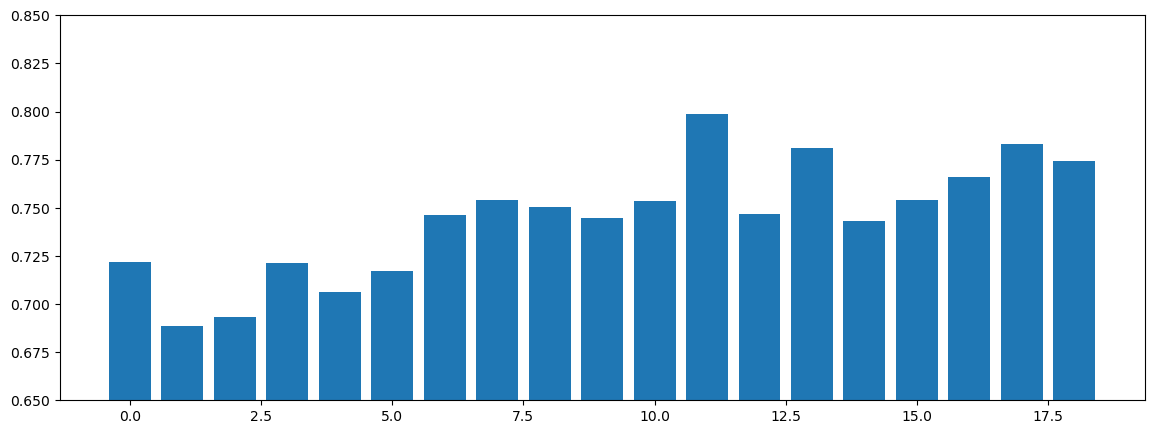

In [15]:
plt.bar(x=np.arange(19), height=full_errors)
plt.ylim((0.65, 0.85))

## Test CQT with max 

In [18]:
def extract_pitches_cqt_ranked_max(y, sr=22050, n_bins=88, bins_per_octave=12, fmin=librosa.note_to_hz("a0"), k_pitches=10):
    """Estimates the pitches in the given signal y and turns
    these estimations into a probability distribution.

    Parameters
    ----------
    y : np.ndarray
        Input signal.
    sr : int, optional
        Sample rate, by default 22050
    n_bins : int, optional
        Number of bins to return, 
        Passed to librosa.cqt, by default 88
    bins_per_octave : int, optional
        Passed to librosa.cqt, by default 12
    fmin : float, optional
        Minimum frequency for librosa.cqt, by default librosa.note_to_hz("f0")

    Returns
    -------
    np.ndarray
        A probability distribution across the 88 pitches we are working with.
    """
    cqt = librosa.cqt(y=y, sr=sr, n_bins=n_bins, bins_per_octave=bins_per_octave, fmin=fmin)
    #log_cqt = librosa.amplitude_to_db(np.abs(cqt))
    abs_cqt = np.abs(cqt)
    clipped_cqt = np.clip(abs_cqt, a_min=0, a_max=None)
    cqt_max = np.max(clipped_cqt, axis=1)
    part_idx = np.argpartition(cqt_max, kth=-k_pitches)[-k_pitches]
    part_val = cqt_max[part_idx]
    cqt_max[cqt_max < (part_val - 0.0001)] = 0
    sum_norm = cqt_max / np.sum(cqt_max)
    if np.isnan(sum_norm).any() or not np.isclose(np.sum(sum_norm), 1):
        return [1/len(sum_norm) for _ in range(len(sum_norm))]
    else:
        return sum_norm

full_errors = []
mixes = [ind.to_mixdown() for ind in individuals]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked_max(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")

Errors for k = 1: 0.7481666666666668
Errors for k = 2: 0.7175
Errors for k = 3: 0.7134999999999999
Errors for k = 4: 0.7054642857142857
Errors for k = 5: 0.7395952380952382
Errors for k = 6: 0.7564047619047618
Errors for k = 7: 0.7487857142857142
Errors for k = 8: 0.7645119047619047
Errors for k = 9: 0.7821309523809525
Errors for k = 10: 0.7867380952380951
Errors for k = 11: 0.8095952380952381
Errors for k = 12: 0.792547619047619
Errors for k = 13: 0.8150714285714287
Errors for k = 14: 0.7799722222222222
Errors for k = 15: 0.8217460317460318
Errors for k = 16: 0.8248174603174602
Errors for k = 17: 0.8375833333333333
Errors for k = 18: 0.7998412698412699
Errors for k = 19: 0.7926507936507936


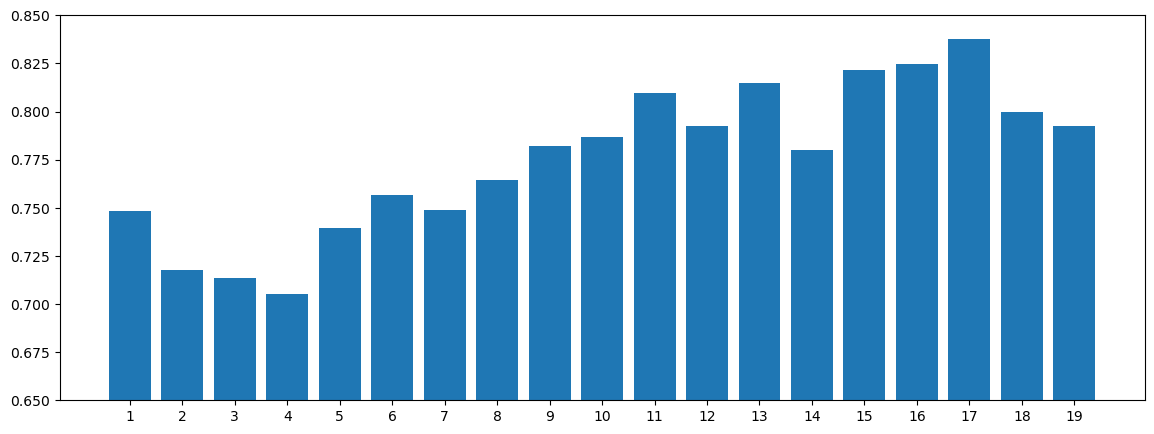

In [21]:
plt.bar(x=list(range(1, 20)), height=full_errors)
plt.ylim((0.65, 0.85))
plt.xticks(list(range(1, 20)))
plt.show()

## Test CQT on extracted harmonics 

Default margins

In [25]:
full_errors = []
mixes = [librosa.effects.harmonic(y=ind.to_mixdown()) for ind in tqdm(individuals, desc="Separating harmonics")]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")






































































































Separating harmonics: 100%|██████████| 100/100 [00:22<00:00,  4.35it/s]


Errors for k = 1: 0.7216666666666667
Errors for k = 2: 0.6773333333333332
Errors for k = 3: 0.6548095238095237
Errors for k = 4: 0.6757499999999999
Errors for k = 5: 0.6916190476190475
Errors for k = 6: 0.7057857142857143
Errors for k = 7: 0.7307738095238093
Errors for k = 8: 0.7089285714285714
Errors for k = 9: 0.7372857142857143
Errors for k = 10: 0.7054484126984127
Errors for k = 11: 0.7073531746031745
Errors for k = 12: 0.7572023809523809
Errors for k = 13: 0.7262936507936507
Errors for k = 14: 0.6990000000000001
Errors for k = 15: 0.7475119047619049
Errors for k = 16: 0.7054166666666667
Errors for k = 17: 0.7839166666666665
Errors for k = 18: 0.740345238095238
Errors for k = 19: 0.7757380952380951


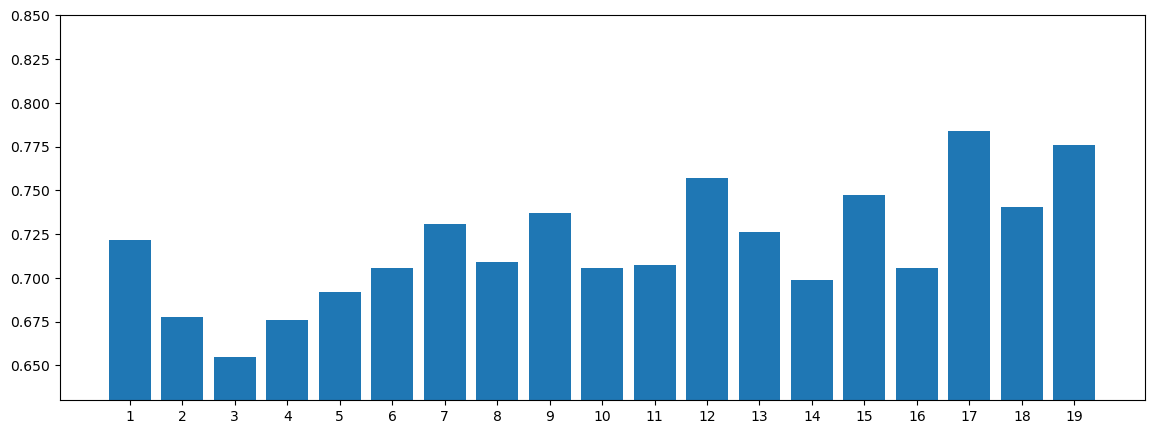

In [27]:
plt.bar(x=list(range(1, 20)), height=full_errors)
plt.ylim((0.63, 0.85))
plt.xticks(list(range(1, 20)))
plt.show()

With higher margin (3.0)

In [43]:
full_errors = []
mixes = [librosa.effects.harmonic(y=ind.to_mixdown(), margin=3.0) for ind in tqdm(individuals, desc="Separating harmonics")]
targets = [Target(y=mix, onsets=[0]) for mix in mixes]
for k in range(1, 20):
    pitch_weights = [extract_pitches_cqt_ranked(y=mix, k_pitches=k) for mix in mixes]
    pops = [init_population(sample_lib=sample_lib, target=target, popsize=POPSIZE, pitch_weights=pitch_weights[i]) for i, target in enumerate(targets)]
    errors = []
    for i, annotation in enumerate(annotations):
        pop = pops[i]
        errors.append(jaccard_error(pop, {0: annotation}, class_mode.PITCHES))
    full_errors.append(np.mean(errors))
    print(f"Errors for k = {k}: {full_errors[-1]}")

Separating harmonics: 100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


Errors for k = 1: 0.7291666666666667
Errors for k = 2: 0.6768333333333334
Errors for k = 3: 0.6816428571428571
Errors for k = 4: 0.6809047619047619
Errors for k = 5: 0.6889642857142857
Errors for k = 6: 0.7397142857142858
Errors for k = 7: 0.7138809523809523
Errors for k = 8: 0.7581071428571429
Errors for k = 9: 0.709452380952381
Errors for k = 10: 0.7267222222222222
Errors for k = 11: 0.7172857142857143
Errors for k = 12: 0.7264285714285715
Errors for k = 13: 0.7646190476190476
Errors for k = 14: 0.7426071428571427
Errors for k = 15: 0.8086309523809524
Errors for k = 16: 0.7672976190476191
Errors for k = 17: 0.7947261904761903
Errors for k = 18: 0.7860714285714284
Errors for k = 19: 0.7617817460317459


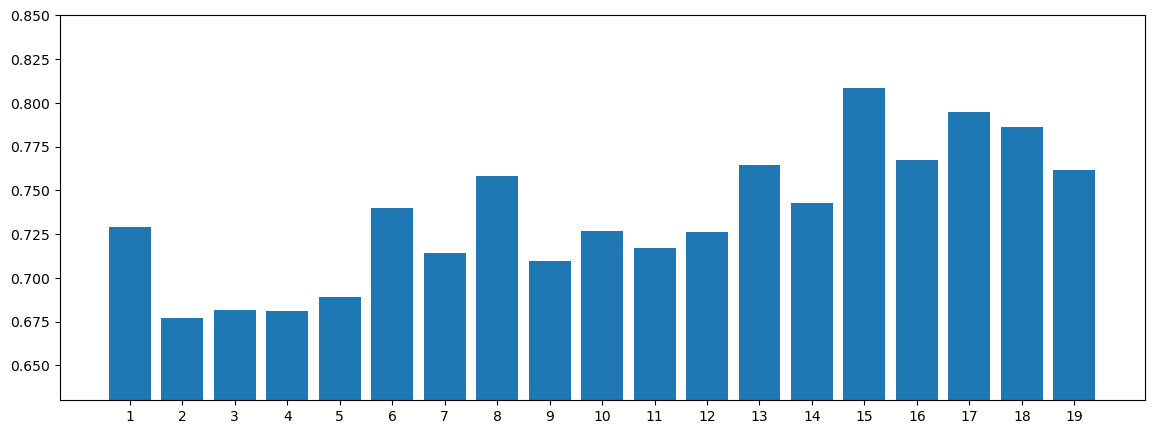

In [44]:
plt.bar(x=list(range(1, 20)), height=full_errors)
plt.ylim((0.63, 0.85))
plt.xticks(list(range(1, 20)))
plt.show()

## Misc

In [6]:
from evoaudio.pitch_detection import extract_pitch_probabilities
k = 5
pitch_probabilities = [extract_pitch_probabilities(y=mix, k_pitches=k) for mix in mixes]


In [7]:
annotations[2]

[('Oud', '54'), ('Flute', '77'), ('TurkeySaz', '53')]

In [8]:
part = np.argpartition(pitch_probabilities[2], kth=-k)[-k:]
part

array([45, 33, 35, 34, 57], dtype=int64)

In [9]:
pitch_probabilities[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.17402747, 0.30572134,
       0.15892386, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.15842102, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.20290636, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

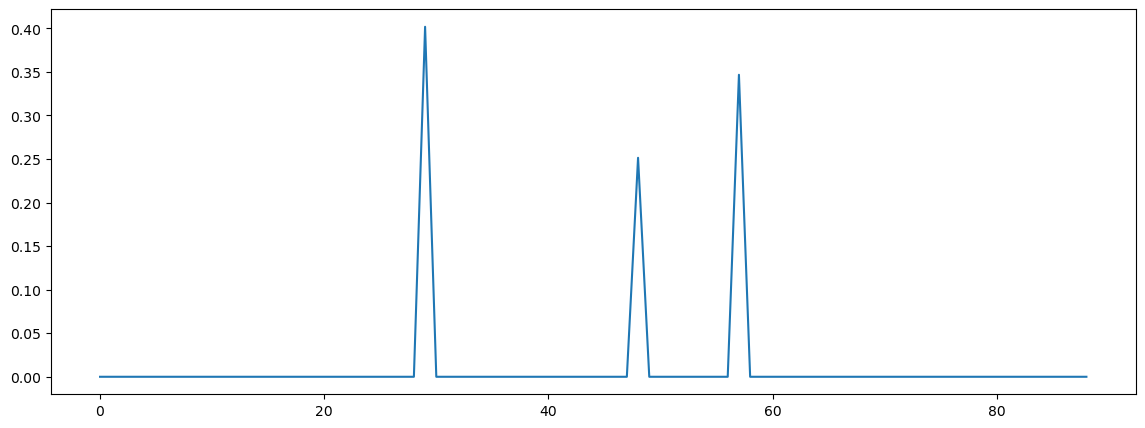

In [25]:
plt.plot(pitch_probabilities[0])

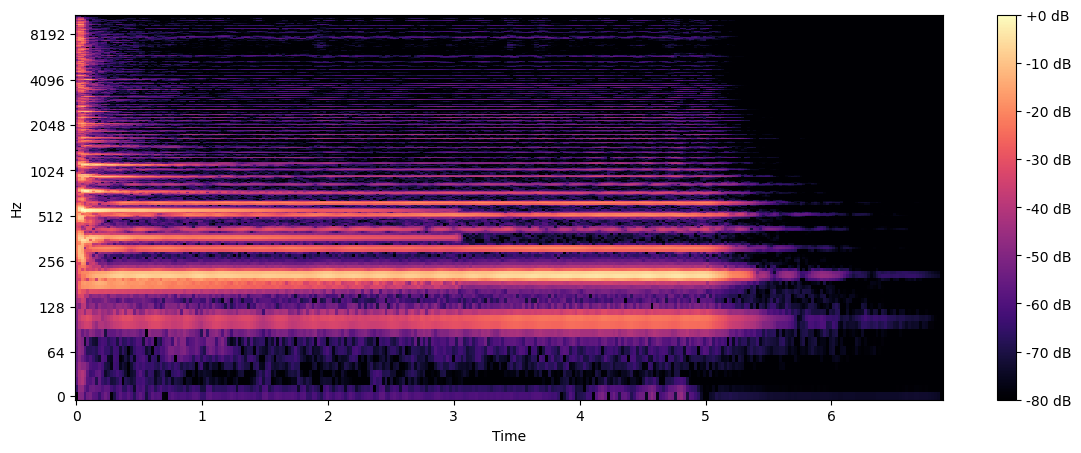

In [28]:
y = mixes[0]
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, y_axis='log', x_axis='time',
                               sr=22050, ax=ax)
ax.label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

C:\Users\justi\AppData\Local\Temp\ipykernel_6984\1052042068.py:1: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(librosa.cqt(y=y), sr=22050, x_axis='time', y_axis='cqt_note',


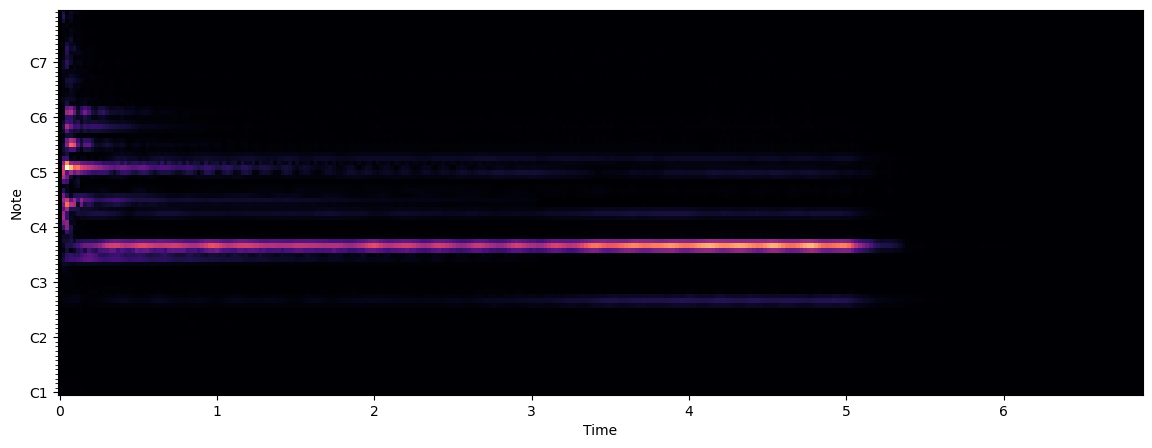

In [26]:
librosa.display.specshow(librosa.cqt(y=y), sr=22050, x_axis='time', y_axis='cqt_note', 
                         bins_per_octave=12)

In [11]:
def estimate_pitch(segment, sr, fmin=50.0, fmax=2000.0):
    """Source: https://musicinformationretrieval.com/pitch_transcription_exercise.html"""
    # Compute autocorrelation of input segment.
    r = librosa.autocorrelate(segment)
    
    # Define lower and upper limits for the autocorrelation argmax.
    i_min = sr/fmax
    i_max = sr/fmin
    r[:int(i_min)] = 0
    r[int(i_max):] = 0
    
    # Find the location of the maximum autocorrelation.
    i = r.argmax()
    top_5 = np.argpartition(r, kth=-5)[-5:]
    f0 = float(sr)/i
    return f0
# f0 = estimate_pitch(x[:sr], sr=sr)
# note = librosa.hz_to_note(f0)
# midi = librosa.note_to_midi(note)
# f0, note, midi

In [12]:
f0 = estimate_pitch(mixes[0], sr=22050)
note = librosa.hz_to_note(f0)
midi = librosa.note_to_midi(note)
note, midi

('A♯1', 34)

In [20]:
r = librosa.autocorrelate(mixes[0])
sr = 22050    
# Define lower and upper limits for the autocorrelation argmax.
i_min = sr/2000
i_max = sr/50
r[:int(i_min)] = 0
r[int(i_max):] = 0
    
# Find the location of the maximum autocorrelation.
i = r.argmax()
top_5 = np.argpartition(r, kth=-100)[-100:]
f0 = float(sr)/i

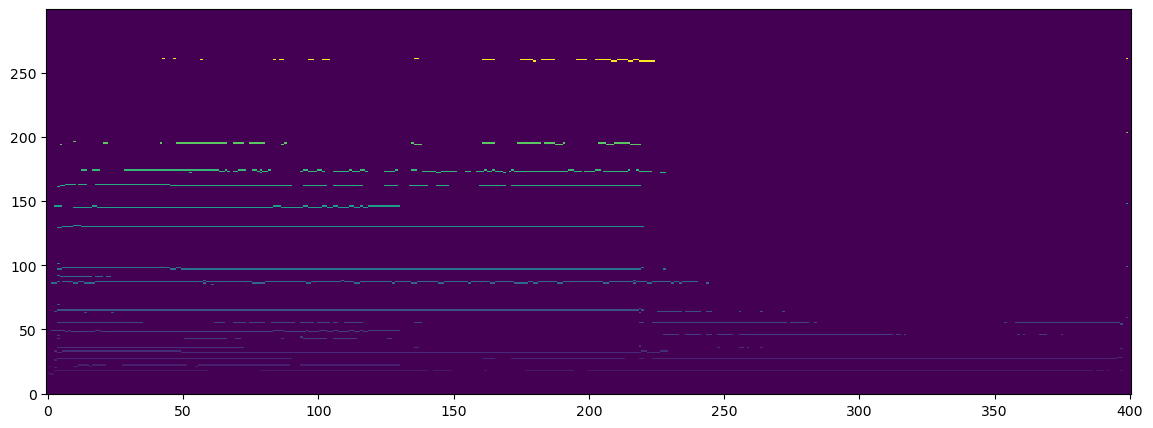

In [29]:
pitches, magnitudes = librosa.piptrack(y=mixes[0])
plt.imshow(pitches[:300], aspect="auto", interpolation="nearest", origin="lower")

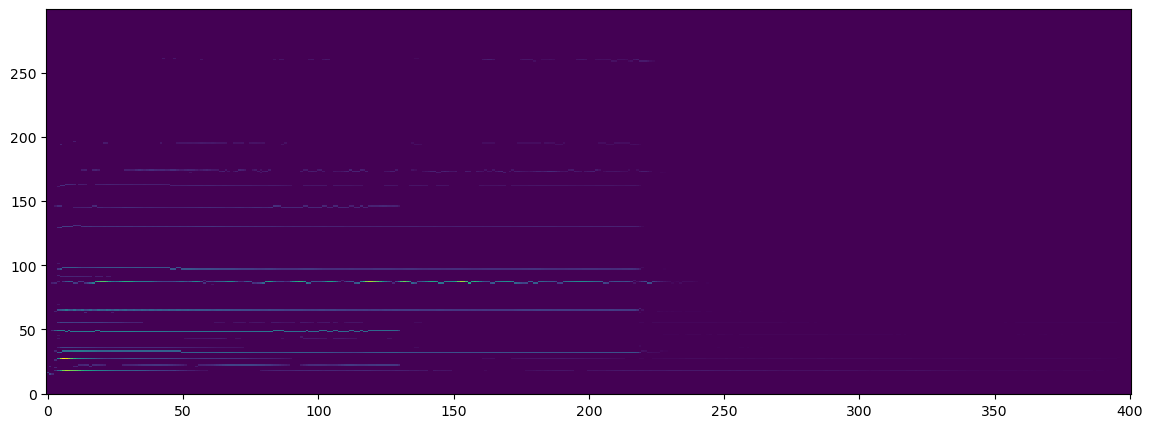

In [30]:
plt.imshow(magnitudes[:300], aspect="auto", interpolation="nearest", origin="lower")

In [38]:
arr = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
np.argpartition(arr, kth=-2, axis=0)

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3]], dtype=int64)